# Read data 

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/alhelal/Desktop/Ismail_IDS_project_2023/Cybersecurity-Intrusion-detection--main/Independent Study/Windows_data/windows7_dataset.csv',na_values=[' '])
df.head()

,ts,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,1554185566,0,90.208333,0.0,0.208333,0.0,2.083333,88.009289,9.791667,216.615181,...,414,26374144,31.955242,926330880,5849088,1957.675542,48304128,0.000000,0,normal
1,1554185581,0,99.791667,0.0,0.000000,0.0,0.104167,98.920487,0.208333,67.861457,...,418,27045888,1.199908,924794880,5849088,0.133323,48107520,0.000000,0,normal
2,1554185596,0,99.791667,0.0,0.000000,0.0,0.208333,99.178867,0.208333,65.999919,...,419,27353088,0.133333,925319168,5849088,0.000000,48033792,0.000000,0,normal
3,1554185611,0,99.687500,0.0,0.000000,0.0,0.104167,99.218316,0.312500,67.399276,...,425,27533312,0.133332,916725760,5849088,1.066655,47960064,0.133332,0,normal
4,1554185626,0,99.791667,0.0,0.000000,0.0,0.208333,99.248713,0.208333,65.532773,...,426,27688960,0.133332,916025344,5849088,0.000000,47943680,0.000000,0,normal


In [2]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 28367
Number of columns: 135


In [3]:
# Calculate the percentage of missing values per column
missing_values_percent = (df.isna().sum() / len(df)) * 100

# Sort the values in descending order
missing_values_percent = missing_values_percent.sort_values(ascending=False)

# Print the result
missing_values_percent.head(10)


Process(_Total) IO Read Bytes sec          0.803751
Process(_Total) IO Data Bytes sec          0.620439
Process(_Total) Page Faults sec            0.479430
Process(_Total) IO Read Operations sec     0.356048
Process(_Total) IO Data Operations sec     0.320795
Process(_Total) pct_ User Time             0.239715
Process(_Total) IO Other Operations sec    0.200938
Process(_Total) IO Write Bytes sec         0.162160
Process(_Total) IO Other Bytes sec         0.158635
Process(_Total) IO Write Operations sec    0.148059
dtype: float64

In [4]:
# Missing value is less than 1.5%, so we can drop them and use the complete case.

# Remove rows with any missing values
df = df.dropna()

In [5]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 28097
Number of columns: 135


In [6]:
# Identify columns with only a single unique value
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index(['Processor(_Total) pct_ C3 Time', 'Processor(_Total) pct_ C2 Time',
       'Processor(_Total) C2 Transitions sec',
       'Processor(_Total) C3 Transitions sec', 'Process(_Total) Elapsed Time',
       'Process(_Total) Creating Process ID', 'Process(_Total) ID Process',
       'Process(_Total) Priority Base',
       'Network_I(6TO4 Adapter) Packets Received Unknown',
       'Network_I(isatap{B4D100D3-}) Packets Received Unknown',
       'Network_I(Intel R _Pro_1000MT) Packets Received Unknown',
       'Network_I(6TO4 Adapter) Bytes Received sec',
       'Network_I(isatap{B4D100D3-}) Bytes Received sec',
       'Network_I(6TO4 Adapter) Bytes Sent sec',
       'Network_I(isatap{B4D100D3-}) Bytes Sent sec',
       'Network_I(6TO4 Adapter) Packets Outbound Errors',
       'Network_I(isatap{B4D100D3-}) Packets Outbound Errors',
       'Network_I(Intel R _Pro_1000MT) Packets Outbound Errors',
       'Network_I(6TO4 Adapter) Packets Received Discarded',
       'Network_I(isatap{B4D100D3

In [7]:
df = df.drop(columns=single_value_columns)

In [8]:
# Get the dimensions of the DataFrame after dropping unnecessary columns
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 28097
Number of columns: 81


We removed the missing entries and remove the variables which have only a single value for all the etries or variability was zero.

# Required Libraries

We are going to use Windows 10 system generated values to predict whether the system is under cyber attack or not !

In [9]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loading the data and EDA


In [10]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,backdoor,ddos,injection,normal,password,ransomware,scanning,xss
label,,,,,,,,
0,0,0,0,22175,0,0,0,0
1,1753,2126,987,0,755,72,225,4


In [11]:
df = df.drop(columns='ts')

# Making the data balance (Under sampling)

In [12]:
#df = df_new

In [13]:
freq = df['label'].value_counts()
freq

0    22175
1     5922
Name: label, dtype: int64

In [14]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(mydata,labels = mylabels, autopct=autopct_format(mydata))

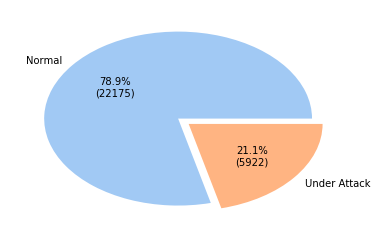

In [15]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [freq[0], freq[1]]
keys = ['Normal', 'Under Attack']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct=autopct_format(data))
  
# displaying chart
plt.show()

In [16]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

0    5987
1    5922
Name: label, dtype: int64

In [17]:
df.shape

(11909, 80)

In [18]:
df.head()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
2,0,99.791667,0.000000,0.208333,99.178867,0.208333,65.999919,0.000000,0.000000,2.266664,...,419,27353088,0.133333,925319168,5849088,0.000000,48033792,0.000000,0,normal
7,0,100.000000,0.000000,0.000000,99.334475,0.000000,71.190052,0.000000,0.000000,7.865568,...,438,28143616,0.266629,893521920,5849088,0.000000,47931392,0.000000,0,normal
8,14,91.875000,0.729167,3.229167,88.883554,8.125000,161.050403,0.729167,4.895833,569.542484,...,411,26755072,1.466519,937791488,5849088,7.465913,48099328,6.199374,0,normal
15,0,100.000000,0.000000,0.000000,99.037370,0.000000,66.198140,0.000000,0.000000,2.933251,...,440,28794880,0.266659,911331328,5849088,0.000000,42684416,0.000000,0,normal
17,0,49.687500,0.416667,36.458333,47.297749,50.312500,239.262523,6.145833,13.854167,390.859897,...,370,54022144,916.784121,925970432,5849088,1140.980238,45043712,73.132067,0,normal


# Investigating the correlation

In [19]:
X = df.iloc[:,0:78]

In [20]:
cormat = X.corr()
round(cormat,2)

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec
Processor(_Total) DPC Rate,1.00,-0.51,0.36,-0.07,-0.50,0.51,0.75,0.18,0.68,0.78,...,0.52,0.49,-0.45,-0.30,-0.00,0.26,0.03,0.73,-0.47,-0.10
Processor(_Total) pct_ Idle Time,-0.51,1.00,-0.71,-0.60,0.99,-1.00,-0.48,-0.38,-0.87,-0.64,...,-0.51,-0.19,0.51,0.42,-0.05,-0.33,-0.13,-0.62,0.51,0.10
Processor(_Total) pct_ Interrupt Time,0.36,-0.71,1.00,0.27,-0.69,0.71,0.28,0.42,0.71,0.45,...,0.25,-0.02,-0.27,-0.20,0.07,0.25,0.06,0.43,-0.29,-0.06
Processor(_Total) pct_ User Time,-0.07,-0.60,0.27,1.00,-0.61,0.60,-0.20,0.26,0.14,-0.11,...,0.15,-0.16,-0.20,-0.23,0.06,0.09,0.16,-0.08,-0.14,-0.01
Processor(_Total) pct_ C1 Time,-0.50,0.99,-0.69,-0.61,1.00,-0.99,-0.47,-0.38,-0.85,-0.62,...,-0.50,-0.18,0.51,0.42,-0.05,-0.34,-0.14,-0.60,0.50,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Memory Committed Bytes,0.26,-0.33,0.25,0.09,-0.34,0.33,0.32,0.07,0.36,0.31,...,0.35,-0.20,-0.21,-0.39,-0.02,1.00,0.06,0.31,-0.26,0.04
Memory System Driver Total Bytes,0.03,-0.13,0.06,0.16,-0.14,0.13,0.02,0.01,0.06,0.03,...,0.06,-0.02,-0.09,-0.19,0.08,0.06,1.00,0.03,0.05,0.51
Memory Pages Input sec,0.73,-0.62,0.43,-0.08,-0.60,0.62,0.87,0.21,0.81,0.92,...,0.57,0.57,-0.53,-0.38,0.04,0.31,0.03,1.00,-0.55,-0.11
Memory Pool Paged Resident Bytes,-0.47,0.51,-0.29,-0.14,0.50,-0.51,-0.51,-0.16,-0.55,-0.58,...,-0.73,-0.40,0.73,0.55,0.07,-0.26,0.05,-0.55,1.00,0.19


AttributeError: Unknown property pad

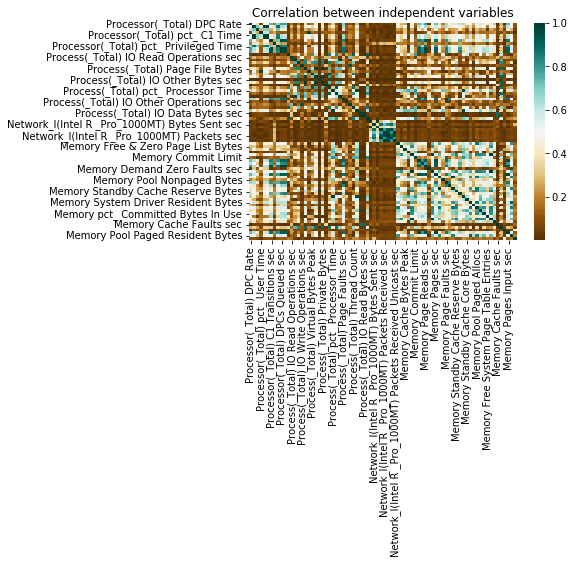

In [21]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr().abs(), dtype=np.bool))

heatmap = sns.heatmap(X.corr().abs(),annot=False,cmap='BrBG')
heatmap.set_title('Correlation between independent variables', fontdict={'fontsize':12}, pad=10);

In [22]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()

,FEATURE_1,FEATURE_2,CORRELATION
0,Processor(_Total) DPC Rate,Processor(_Total) DPC Rate,1.000000
1,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,0.510533
2,Processor(_Total) DPC Rate,Processor(_Total) pct_ Interrupt Time,0.361777
3,Processor(_Total) DPC Rate,Processor(_Total) pct_ User Time,0.070845
4,Processor(_Total) DPC Rate,Processor(_Total) pct_ C1 Time,0.498770


In [23]:
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [24]:
df_corr_perfect = df_corr[df_corr.CORRELATION == 1]

In [25]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
1269,Process(_Total) Page File Bytes,Process(_Total) Private Bytes,1.0
1654,Process(_Total) Private Bytes,Process(_Total) Page File Bytes,1.0
3005,Network_I(Intel R _Pro_1000MT) Packets Sent Un...,Network_I(Intel R _Pro_1000MT) Packets Sent sec,1.0
3084,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
3236,Network_I(Intel R _Pro_1000MT) Packets Sent sec,Network_I(Intel R _Pro_1000MT) Packets Sent Un...,1.0
3315,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
3719,Memory Available Bytes,Memory Available KBytes,1.0
4181,Memory Available KBytes,Memory Available Bytes,1.0


In [26]:
# Relabel the row numbers
df_corr_perfect.reset_index(drop=True, inplace=True)

# Delete even rows
df_corr_perfect = df_corr_perfect[df_corr_perfect.index % 2 != 0]
df_corr_perfect


,FEATURE_1,FEATURE_2,CORRELATION
1,Process(_Total) Private Bytes,Process(_Total) Page File Bytes,1.0
3,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
5,Network_I(Intel R _Pro_1000MT) Packets Receive...,Network_I(Intel R _Pro_1000MT) Packets Receive...,1.0
7,Memory Available KBytes,Memory Available Bytes,1.0


In [27]:
lst1 = df_corr_perfect.FEATURE_1
remove_var = list(set(lst1))

In [28]:
df = df.drop(remove_var, axis=1)

In [29]:
df.shape

(11909, 76)

In [30]:
df.head()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
2,0,99.791667,0.000000,0.208333,99.178867,0.208333,65.999919,0.000000,0.000000,2.266664,...,419,27353088,0.133333,925319168,5849088,0.000000,48033792,0.000000,0,normal
7,0,100.000000,0.000000,0.000000,99.334475,0.000000,71.190052,0.000000,0.000000,7.865568,...,438,28143616,0.266629,893521920,5849088,0.000000,47931392,0.000000,0,normal
8,14,91.875000,0.729167,3.229167,88.883554,8.125000,161.050403,0.729167,4.895833,569.542484,...,411,26755072,1.466519,937791488,5849088,7.465913,48099328,6.199374,0,normal
15,0,100.000000,0.000000,0.000000,99.037370,0.000000,66.198140,0.000000,0.000000,2.933251,...,440,28794880,0.266659,911331328,5849088,0.000000,42684416,0.000000,0,normal
17,0,49.687500,0.416667,36.458333,47.297749,50.312500,239.262523,6.145833,13.854167,390.859897,...,370,54022144,916.784121,925970432,5849088,1140.980238,45043712,73.132067,0,normal


In [31]:
# Remove the multiple attack types column
df = df.drop('type', axis=1)

## Seperating independent and dependent variables:

In [32]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [33]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [34]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [35]:
df.shape

(11909, 75)

# Train test Split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Supervised Model selection

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10,20,50],
            'kernel': ['rbf','poly','sigmoid','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,15,25],
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [39]:
import time
start = time.time()

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_output = pd.DataFrame(scores,columns=['model','best_score','best_params'])


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:12:40.86


In [40]:
model_output

,model,best_score,best_params
0,svm,0.954550,"{'C': 50, 'kernel': 'linear'}"
1,random_forest,0.994542,"{'criterion': 'entropy', 'max_depth': 15, 'max..."


In [41]:
model_output.best_params[0]

{'C': 50, 'kernel': 'linear'}

In [42]:
svm= SVC(gamma='auto',C = 50,kernel = 'linear') 
svm.fit(X_train, y_train)
# Measure model performance
y_pred_svm = svm.predict(X_test)

In [43]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_svm))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_svm))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_svm))

Test Accuracy: 0.955
Test Precision: 0.962
Test Recall: 0.948
Test F-1: 0.955


In [44]:
model_output.best_params[1]

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 50}

In [45]:
forest=RandomForestClassifier( n_estimators= 50, max_depth=15, criterion='entropy',max_features = 'log2')
forest.fit(X_train, y_train)
# Measure model performance
y_pred_rf = forest.predict(X_test)

In [46]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_rf))

Test Accuracy: 0.993
Test Precision: 0.989
Test Recall: 0.997
Test F-1: 0.993


Between the two supervised model random forest is the clear winner and the test accuracy is 99.3%.

In [47]:
# Random forest
forest.fit(X_train, y_train)
y_pred_prob_rf = forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

In [49]:
# SVM 
modelSVMlinear=SVC(gamma='auto',C = 50,kernel = 'linear', probability=True)
modelSVMlinear.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

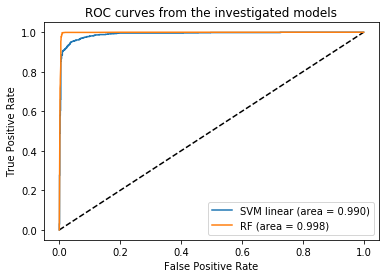

In [50]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Unsupervised modelling:

## SOM

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom
from sklearn.base import BaseEstimator, TransformerMixin

In [55]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [56]:
class MiniSomWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, som_shape=(1, 2), sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian'):
        self.som_shape = som_shape
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.neighborhood_function = neighborhood_function
        self.som = None

    def fit(self, X, y=None):
        self.som = MiniSom(self.som_shape[0], self.som_shape[1], X.shape[1],
                           sigma=self.sigma, learning_rate=self.learning_rate,
                           neighborhood_function=self.neighborhood_function)
        self.som.pca_weights_init(X)
        self.som.train_random(X, 100, verbose=False)
        return self

    def transform(self, X):
        return classify(self.som, X)

    def predict(self, X):
        return self.transform(X)

In [57]:
start = time.time()
# Define the parameter grid
param_grid = {
    'sigma': [1,2, 4, 6],
    'learning_rate': [.05,0.1, 0.5, 0.8],
    'neighborhood_function': ['gaussian', 'triangle']
}

# Create an instance of the MiniSomWrapper model
som = MiniSomWrapper(som_shape=(1, 2))

# Create a grid search object
grid_search = GridSearchCV(som, param_grid, scoring='accuracy', cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

/usr/local/lib/python3.6/dist-packages/minisom.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Execution time: 00:01:00.73


In [58]:
# Print the best parameters and the corresponding classification report
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'neighborhood_function': 'gaussian', 'sigma': 1}


In [59]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Precision: %.3f' % precision_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Recall: %.3f' % recall_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test F-1: %.3f' % f1_score(y_test, classify(grid_search.best_estimator_.som, X_test)))

Test Accuracy: 0.535
Test Precision: 0.520
Test Recall: 0.829
Test F-1: 0.640


## K-means clustering 

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [61]:
start = time.time()

# Define the parameter grid
param_grid = {
    'n_init': [50, 100, 200],
    'init': ['k-means++', 'random'],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create the KMeans instance
kmeans = KMeans(n_clusters = 2)

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=10)

# Fit the data to perform grid search
grid_search.fit(X_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the data
best_model.fit(X_train)

# Predict the cluster labels
labels = best_model.predict(X_test)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:06:57.46


In [62]:
# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'algorithm': 'auto', 'init': 'k-means++', 'n_init': 50}
Best Score:  -1227.1545400028


In [68]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, labels)
precision = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f_score = f1_score(y_test, labels, average='macro')

In [69]:
# Print the evaluation metrics
print("Accuracy: ", round(accuracy,3))
print("Precision: ", round(precision,3))
print("Recall: ", round(recall,3))
print("F-score: ", round(f_score,3))

Accuracy:  0.54
Precision:  0.551
Recall:  0.539
F-score:  0.51
